# 6. Simplification
http://docs.sympy.org/latest/tutorial/simplification.html

In [154]:
from sympy import *
init_session(use_unicode = True)

IPython console for SymPy 1.0 (Python 3.6.0-64-bit) (ground types: python)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.0/


## simplify
Now let’s jump in and do some interesting mathematics. One of the most useful features of a symbolic manipulation system is ***the ability to simplify mathematical expressions***. SymPy has dozens of functions to perform various kinds of simplification. There is also one general function called ***simplify()*** that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression. Here are some examples

In [155]:
simplify(sin(x)**2 + cos(x)**2)

In [156]:
simplify((x**3 + x**2 - x - 1) / (x**2 + 2*x + 1))

In [157]:
simplify(gamma(x) / gamma(x-2))

Here, gamma(x) is $\Gamma(x)$, the gamma function. We see that simplify() is capable of handling a large class of expressions.

But simplify() has a pitfall.  

- It just applies all the major simplification operations in SymPy, and uses heuristics to determine the simplest result. But “simplest” is not a well-defined term. For example, say we wanted to “simplify” $x^2+2x+1$ into $(x+1)^2$:

In [158]:
simplify(x**2 + 2*x + 1)

We did not get what we want. There is a function to perform this simplification, called ***factor()***, which will be discussed below.

- Another pitfall to simplify() is that it can be unnecessarily slow, since it tries many kinds of simplifications before picking the best one. If you already know exactly what kind of simplification you are after, it is better to apply the specific simplification function(s) that apply those simplifications.

Applying specific simplification functions instead of simplify() also has the advantage that specific functions have certain guarantees about the form of their output. These will be discussed with each function below. For example, factor(), when called on a polynomial with rational coefficients, is guaranteed to factor the polynomial into irreducible factors. simplify() has no guarantees. It is entirely heuristical, and, as we saw above, it may even miss a possible type of simplification that SymPy is capable of doing.

simplify() is best when used interactively, when you just want to whittle down an expression to a simpler form. You may then choose to apply specific functions once you see what simplify() returns, to get a more precise result. It is also useful when you have no idea what form an expression will take, and you need a catchall function to simplify it.

## Polynomial/Rational Function Simplification¶
### expand
***expand()*** is one of the most common simplification functions in SymPy. Although it has a lot of scopes, for now, we will consider its function in expanding polynomial expressions. For example:

In [159]:
expand((x + 1)**2)

In [160]:
expand((x + 2)*(x - 3))

Given a polynomial, ***expand()*** will put it into a ***canonical form*** of a sum of monomials.

expand() may not sound like a simplification function. After all, by its very name, it makes expressions bigger, not smaller. Usually this is the case, but often an expression will become smaller upon calling expand() on it due to ***cancellation***.



In [161]:
expand((x + 1)*(x - 2) - (x - 1)*x)

### factor
***factor()*** takes a polynomial and factors it into irreducible factors over the rational numbers. For example:

In [162]:
factor(x**3 - x**2 + x - 1)

In [163]:
factor(x**2*z + 4*x*y*z + 4*y**2*z)

For polynomials, factor() is the opposite of expand(). factor() uses a complete multivariate factorization algorithm over the rational numbers, which means that each of the factors returned by factor() is guaranteed to be ***irreducible***.

If you are interested in the factors themselves, ***factor_list*** returns a more structured output.

In [164]:
factor_list(x**2*z + 4*x*y*z + 4*y**2*z)

Note that the input to factor and expand need not be polynomials in the strict sense. They will intelligently factor or expand any kind of expression (though note that the factors may not be irreducible if the input is no longer a polynomial over the rationals).

In [165]:
expand((cos(x) + sin(x))**2)

In [166]:
factor(sin(x)**2 + 2*sin(x)*cos(x) + cos(x)**2)

### collect
collect() collects common powers of a term in an expression. For example

In [167]:
expr = x*y + x -3 + 2*x**2 - z*x**2 + x**3
expr

In [168]:
collected_expr = collect(expr, x)
collected_expr

***collect()*** is particularly useful in conjunction with the ***.coeff()*** method. ***expr.coeff(x, n)*** gives the coefficient of x**n in expr:

In [169]:
collected_expr.coeff(x, 2)

### cancel
***cancel()*** will take any rational function and put it into the standard ***canonical form***, $\frac{p}{q}$, where p and q are expanded polynomials with no common factors, and the leading coefficients of p and q do not have denominators (i.e., are integers).

In [170]:
cancel((x**2 + 2*x + 1) / (x**2 + x))

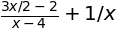

In [171]:
expr = 1/x + (3*x/2 - 2)/(x - 4)
expr

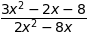

In [172]:
cancel(expr)

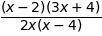

In [173]:
factor(expr)

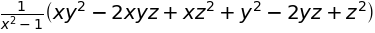

In [174]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
expr

In [175]:
cancel(expr)

Note that since factor() will completely factorize both the numerator and the denominator of an expression, it can also be used to do the same thing:

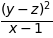

In [176]:
factor(expr)

However, if you are only interested in making sure that the expression is in canceled form, cancel() is more efficient than factor().

### apart
apart() performs a ***[partial fraction decomposition](http://en.wikipedia.org/wiki/Partial_fraction_decomposition)*** on a rational function.

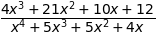

In [177]:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr

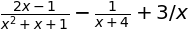

In [178]:
apart(expr)

## Trigonometric Simplification
#### Note
SymPy follows Python’s naming conventions for inverse trigonometric functions, which is to append an ***a*** to the front of the function’s name. For example, the inverse cosine, or arc cosine, is called ***acos()***. 

In [179]:
acos(x)

In [180]:
cos(acos(x))

In [181]:
asin(1)

### trigsimp
To simplify expressions using trigonometric identities, use ***trigsimp()***.

In [182]:
trigsimp(sin(x)**2 + cos(x)**2)

In [183]:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

In [184]:
trigsimp(sin(x)*tan(x) / sec(x))

trigsimp() also works with ***hyperbolic trig functions***.

In [185]:
trigsimp(cosh(x)**2 + sinh(x)**2)

In [186]:
trigsimp(sinh(x) / tanh(x))

Much like simplify(), trigsimp() applies various trigonometric identities to the input expression, and then uses a heuristic to return the “best” one.

### expand_trig
To expand trigonometric functions, that is, apply the sum or double angle identities, use ***expand_trig()***.

In [187]:
expand(sin(x + y))

In [188]:
expand_trig(sin(x + y))

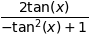

In [189]:
expand_trig(tan(2*x))

Because expand_trig() tends to make trigonometric expressions larger, and trigsimp() tends to make them smaller, these identities can be applied in reverse using trigsimp()

In [190]:
trigsimp(sin(x)*cos(y) + sin(y)*cos(x))

## Powers
Before we introduce the power simplification functions, a mathematical discussion on the identities held by powers is in order. There are ***three kinds of identities*** satisfied by exponents

1. $x^ax^b = x^{a + b}$  
2. $x^ay^a = (xy)^a$  
3. $(x^a)^b = x^{ab}$

Identity 1 is always true.

Identity 2 is not always true. For example, if x=y=−1 and $a=\frac{1}{2}$, then $x^ay^a = \sqrt{-1}\sqrt{-1} = i\cdot i = -1$, whereas $(xy)^a = \sqrt{-1\cdot-1} = \sqrt{1} = 1$. However, identity 2 is true at least if x and y are nonnegative and a is real (it may also be true under other conditions as well). A common consequence of the failure of identity 2 is that $\sqrt{x}\sqrt{y} \neq \sqrt{xy}$.

Identity 3 is not always true. For example, if x=−1, a=2, and b=1/2, then $(x^a)^b = {\left ((-1)^2\right )}^{1/2} = \sqrt{1} = 1$ and $x^{ab} = (-1)^{2\cdot1/2} = (-1)^1 = -1$. However, identity 3 is true when bb is an integer (again, it may also hold in other cases as well). Two common consequences of the failure of identity 3 are that $\sqrt{x^2}\neq x$ and that $\sqrt{\frac{1}{x}} \neq \frac{1}{\sqrt{x}}$.

To summarize
```
Identity	Sufficient conditions to hold	Counterexample when conditions are not met	Important consequences
xaxb=xa+bxaxb=xa+b
Always true	None	None
xaya=(xy)axaya=(xy)a
x,y≥0x,y≥0 and a∈ℝa∈R	(−1)1/2(−1)1/2≠(−1⋅−1)1/2(−1)1/2(−1)1/2≠(−1⋅−1)1/2	x√y√≠xy‾‾√xy≠xy in general
(xa)b=xab(xa)b=xab
b∈ℤb∈Z	((−1)2)1/2≠(−1)2⋅1/2((−1)2)1/2≠(−1)2⋅1/2	x2‾‾√≠xx2≠x and 1x‾‾√≠1x√1x≠1x in general
```

This is important to remember, because by default, SymPy will not perform simplifications if they are not true in general.

In order to make SymPy perform simplifications involving identities that are only true under certain assumptions, we need to put assumptions on our Symbols. We will undertake a full discussion of the assumptions system later, but for now, all we need to know are the following.

***By default, SymPy Symbols are assumed to be complex*** (elements of ℂC). That is, a simplification will not be applied to an expression with a given Symbol unless it holds for all complex numbers.

Symbols can be given different ***assumptions*** by passing the assumption to symbols(). For the rest of this section, we will be assuming that x and y are positive, and that a and b are real. We will leave z, t, and c as arbitrary complex Symbols to demonstrate what happens in that case.

In [191]:
x, y, = symbols('x y', positive = True)
a, b = symbols('a b', real = True)
z, t, c = symbols('z t c')

#### Note
In SymPy, sqrt(x) is just a shortcut to x**Rational(1, 2). They are exactly the same object.

In [192]:
sqrt(x) == x**Rational(1, 2)

True

In [193]:
sqrt(x)

In [194]:
x**Rational(1, 2)

### powsimp
powsimp() applies ***identities 1 and 2 from above, from left to right***

In [195]:
powsimp(x**a*x**b)

In [196]:
powsimp(x**a * y**a)

Notice that powsimp() refuses to do the simplification if it is not valid.

In [197]:
powsimp(t**c * z**c)

If you know that you want to apply this simplification, but you don’t want to mess with assumptions, you can pass the ***force=True*** flag. This will force the simplification to take place, regardless of assumptions.

In [198]:
powsimp(t**c * z**c, force = True)

Note that in some instances, in particular, when the exponents are integers or rational numbers, and identity 2 holds, it will be applied automatically

In [199]:
(z*t)**2

In [200]:
sqrt(x * y)

This means that it will be impossible to undo this identity with powsimp(), because even if powsimp() were to put the bases together, they would be automatically split apart again.

In [201]:
powsimp(z**2 * t**2)

In [202]:
powsimp(sqrt(x) * sqrt(y))

### expand_power_exp / expand_power_base
expand_power_exp() and expand_power_base() apply identities ***1 and 2 from right to left***, respectively.

In [203]:
expand_power_exp(x**(a + b))

In [204]:
expand_power_base((x*y)**a)

As with powsimp(), identity 2 is not applied if it is not valid.

In [205]:
expand_power_base((z*t)**c)

And as with ***powsimp()***, you can force the expansion to happen without fiddling with assumptions by using ***force=True***.

In [206]:
expand_power_base((z*t)**c, force = True)

As with identity 2, identity 1 is applied automatically if the power is a number, and hence cannot be undone with expand_power_exp().

In [207]:
x**2*x**3

In [208]:
expand_power_exp(x**5)

### powdenest
powdenest() applies identity 3, from left to right.

In [209]:
powdenest((x**a)**b)

As before, the identity is not applied if it is not true under the given assumptions.

In [210]:
powdenest((z**a)**b)

And as before, this can be manually overridden with force=True.

In [211]:
powdenest((z**a)**b, force = True)

## Exponentials and logarithms
#### Note
In SymPy, as in Python and most programming languages, ***log*** is the ***natural logarithm***, also known as ***ln***. SymPy automatically provides an alias ***ln = log*** in case you forget this.

In [212]:
ln(x)

Logarithms have similar issues as powers. There are two main identities

1. $\log{(xy)} = \log{(x)} + \log{(y)}$
2. $\log{(x^n)} = n\log{(x)}$ 

Neither identity is true for arbitrary complex x and y, due to the branch cut in the complex plane for the complex logarithm. However, sufficient conditions for the identities to hold are if x and y are positive and n is real.

In [213]:
x, y = symbols('x y', positive = True)
n = symbols('n', real = True)

As before, z and t will be Symbols with no additional assumptions.

Note that the identity $\log{\left (\frac{x}{y}\right )} = \log(x) - \log(y)$ is a special case of identities 1 and 2 by $\log{\left (x\cdot\frac{1}{y}\right )} =$, and thus it also holds if x and y are positive, but may not hold in general.

We also see that $\log{\left( e^x \right)} = x$ comes from $\log{\left ( e^x
\right)} = x\log(e) = x$, and thus holds when x is real (and it can be verified that it does not hold in general for arbitrary complex x, for example, $\log{\left (e^{x + 2\pi i}\right)} = \log{\left (e^x\right )} = x
\neq x + 2\pi i$.

### expand_log
To apply identities 1 and 2 ***from left to right***, use ***expand_log()***. As always, the identities will not be applied unless they are valid.

In [214]:
expand_log(log(x*y))

In [215]:
expand_log(log(x / y))

In [216]:
expand_log(log(x**2))

In [217]:
expand_log(log(x**n))

In [218]:
expand_log(log(z*t))

As with powsimp() and powdenest(), expand_log() has a force option that can be used to ignore assumptions.

In [219]:
expand_log(log(z**2), force = True)

In [220]:
expand_log(log(z**2))

## logcombine
To apply identities 1 and 2 from right to left, use logcombine().

In [221]:
logcombine(log(x) + log(y))

In [222]:
logcombine(n * log(x))

In [223]:
logcombine(n * log(z))

logcombine() also has a force option that can be used to ignore assumptions.

In [224]:
logcombine(n * log(z), force = True)

## Special Functions
SymPy implements dozens of special functions, ranging from functions in combinatorics to mathematical physics.

An extensive list of the special functions included with SymPy and their documentation is at the Functions Module page.

For the purposes of this tutorial, let’s introduce a few special functions in SymPy.

Let’s define x, y, and z as regular, complex Symbols, removing any assumptions we put on them in the previous section. We will also define k, m, and n.

In [225]:
x, y, z = symbols('x y z')
k, m, n = symbols('k m n')

####  factorial
The factorial function is factorial ***factorial(n)*** represents $n!= 1\cdot2\cdots(n - 1)\cdot
n$.  
$n!$ represents the number of ***permutations*** of n distinct items.

In [226]:
factorial(n)

#### binomial
The binomial coefficient function is binomial. ***binomial(n, k)*** represents $\binom{n}{k}$, the number of ways to choose k items from a set of n distinct items. It is also often written as ***nCk***, and is pronounced “***n choose k***”.

In [227]:
binomial(n, k)

#### gamma
The factorial function is closely related to the gamma function, gamma. ***gamma(z)*** represents $\Gamma(z) = \int_0^\infty t^{z - 1}e^{-t}\,dt$, which for positive integer z is the same as (z−1)!.

In [228]:
gamma(z)

#### hypergeometric
The generalized hypergeometric function is hyper. ***hyper([a_1, ..., a_p], [b_1, ..., b_q], z)*** represents ${}_pF_q\left(\begin{matrix} a_1, \dots, a_p \\ b_1, \dots, b_q \end{matrix}
\middle| z \right)$. The most common case is ${}_2F_1$, which is often referred to as the ordinary hypergeometric function.

Run code block in SymPy Live

In [229]:
hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

### rewrite
A common way to deal with special functions is to ***rewrite*** them in terms of one another. This works for any function in SymPy, not just special functions. To rewrite an expression in terms of a function, use ***expr.rewrite(function)***. For example,

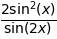

In [230]:
tan(x).rewrite(sin)

In [231]:
factorial(x).rewrite(gamma)

### expand_func
To expand special functions in terms of some identities, use ***expand_func()***. For example

In [232]:
expand_func(gamma(x + 3))

In [233]:
gamma(x + 3).rewrite(factorial)

### hyperexpand
To rewrite hyper in terms of more standard functions, use ***hyperexpand()***.

In [234]:
hyperexpand(hyper([1, 1], [2], z))

In [235]:
expr = meijerg([[1], [1]], [[1], []], -z)
expr

╭─╮1, 1 ⎛1  1 │   ⎞
│╶┐     ⎜     │ -z⎟
╰─╯2, 1 ⎝1    │   ⎠

In [236]:
hyperexpand(expr)

### combsimp
To simplify combinatorial expressions, use ***combsimp()***.

In [237]:
combsimp(factorial(n) / factorial(n-3))

In [238]:
combsimp(binomial(n+1, k+1) / binomial(n, k))

combsimp() also simplifies expressions with gamma.

In [239]:
combsimp(gamma(x) * gamma(1 - x))

## Example: Continued Fractions
Let’s use SymPy to explore continued fractions. A ***continued fraction*** is an expression of the form
>$a_0 + \cfrac{1}{a_1 + \cfrac{1}{a_2 + \cfrac{1}{ \ddots + \cfrac{1}{a_n}
}}}$

where $a_0, \ldots, a_n$ are integers, and $a_1, \ldots, a_n$ are positive. A continued fraction can also be infinite, but infinite objects are more difficult to represent in computers, so we will only examine the finite case here.

A continued fraction of the above form is often represented as a list $[a_0;
a_1, \ldots, a_n]$. Let’s write a simple function that converts such a list to its continued fraction form. The easiest way to construct a continued fraction from a list is to work backwards. Note that despite the apparent symmetry of the definition, the first element, a0, must usually be handled differently from the rest.

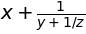

In [240]:
def list_to_frac(l):
    expr = Integer(0)
    for i in reversed(l[1:]):
        expr += i
        expr = 1 / expr
    return l[0] + expr

list_to_frac([x, y, z])

We use Integer(0) in list_to_frac so that the result will always be a SymPy object, even if we only pass in Python ints.

In [241]:
list_to_frac([1, 2, 3, 4])

Every finite continued fraction is a rational number, but we are interested in symbolics here, so let’s create a symbolic continued fraction. The symbols() function that we have been using has a shortcut to create numbered symbols. ***symbols('a0:5')*** will create the symbols a0, a1, ..., a5.

In [242]:
syms = symbols('a0:5')
syms

In [243]:
a0,a1,a2,a3,a4 = syms
a0,a1,a2,a3,a4 

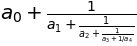

In [244]:
frac = list_to_frac(syms)
frac

This form is useful for understanding continued fractions, but lets put it into standard rational function form using ***cancel()***.

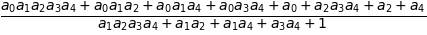

In [245]:
frac = cancel(frac)
frac

Now suppose we were given frac in the above canceled form. In fact, we might be given the fraction in any form, but we can always put it into the above canonical form with cancel(). Suppose that we knew that it could be rewritten as a continued fraction. How could we do this with SymPy? A continued fraction is recursively $c + \frac{1}{f}$, where c is an integer and f is a (smaller) continued fraction. If we could write the expression in this form, we could pull out each c recursively and add it to a list. We could then get a continued fraction with our list_to_frac() function.

The key observation here is that we can convert an expression to the form $c + \frac{1}{f}$ by doing a ***partial fraction decomposition*** with respect to c. This is because f does not contain c. This means we need to use the apart() function. We use ***apart()*** to pull the term out, then subtract it from the expression, and take the reciprocal to get the f part.

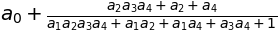

In [246]:
l = []
frac = apart(frac, a0)
frac

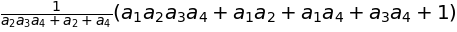

In [247]:
l.append(a0)
frac = 1 / (frac - a0)
frac

Now we repeat this process

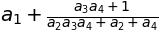

In [248]:
frac = apart(frac, a1)
frac

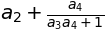

In [249]:
l.append(a1)
frac = 1 / (frac - a1)
frac = apart(frac, a2)
frac

In [250]:
l.append(a2)
frac = 1 / (frac - a2)
frac = apart(frac, a3)
frac

In [251]:
l.append(a3)
frac = 1 / (frac - a3)
frac = apart(frac, a4)
frac

In [252]:
l.append(a4)

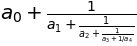

In [253]:
list_to_frac(l)

Of course, this exercise seems pointless, because we already know that our frac is list_to_frac([a0, a1, a2, a3, a4]). So try the following exercise. Take a list of symbols and randomize them, and create the canceled continued fraction, and see if you can reproduce the original list. For example

In [254]:
import random
l = list(symbols('a0:5'))
random.shuffle(l)
orig_frac = frac = cancel(list_to_frac(l))
l

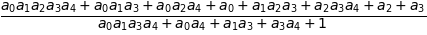

In [255]:
del l
orig_frac

Click on “Run code block in SymPy Live” on the definition of list_to_frac) above, and then on the above example, and try to reproduce l from frac. I have deleted l at the end to remove the temptation for peeking (you can check your answer at the end by calling cancel(list_to_frac(l)) on the list that you generate at the end, and comparing it to orig_frac.

See if you can think of a way to figure out what symbol to pass to apart() at each stage (hint: think of what happens to a0a0 in the formula a0+1a1+⋯a0+1a1+⋯ when it is canceled).